In [1]:
from typing import ContextManager
from astropy.io.fits import hdu
from Spectra import *
from SpectraData import *
from Inventory import *
import matplotlib.pyplot as plt
from astropy.io import fits
import pandas as pd
import sys, os
import numpy as np
from rescaleSky import *
import glob 
from mergeExpositions import *
from HighSeeing import HighSeeing_Filter
import warnings
from astropy.stats import sigma_clip
import seaborn as sns
from Tools import *
import pandas
from FluxLims import *

warnings.filterwarnings('ignore')

print(os.getcwd())

/Users/gonzalo/Desktop/Code/Gonzalo_Binospec/code


[7275.840003967285, 7276.4600039720535, 7277.080003976822, 7315.520004272461, 7316.140004277229, 7328.540004372597, 7340.320004463196, 7340.940004467964, 7369.460004687309, 7598.240006446838, 7603.820006489754, 7750.140007615089, 7750.760007619858, 7792.920007944107, 7793.540007948875, 7794.160007953644, 7808.420008063316, 7820.820008158684, 7821.440008163452, 7852.440008401871, 8344.10001218319, 8344.720012187958, 8398.040012598038, 8400.520012617111, 8416.640012741089, 8430.900012850761, 8431.52001285553, 8432.140012860298, 8453.220013022423, 8453.840013027191, 8466.240013122559, 8466.860013127327, 8494.140013337135, 8494.760013341904, 8505.300013422966, 8505.920013427734, 8506.540013432503, 8546.840013742447, 8547.460013747215, 8652.860014557838, 8662.780014634132, 8663.4000146389, 8760.120015382767, 8760.740015387535, 8775.000015497208, 8777.480015516281, 8789.880015611649, 8825.220015883446, 8825.840015888214, 8826.460015892982, 8835.14001595974, 8865.52001619339, 8866.14001619815

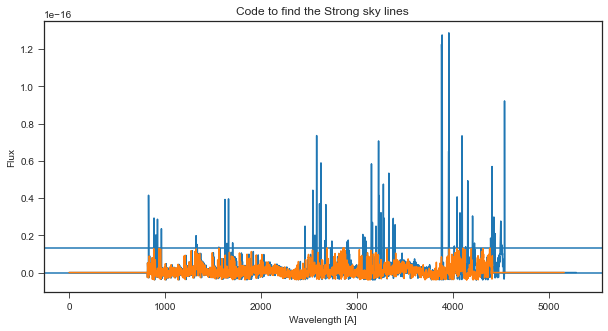

[7275.840003967285,
 7276.4600039720535,
 7277.080003976822,
 7315.520004272461,
 7316.140004277229,
 7328.540004372597,
 7340.320004463196,
 7340.940004467964,
 7369.460004687309,
 7598.240006446838,
 7603.820006489754,
 7750.140007615089,
 7750.760007619858,
 7792.920007944107,
 7793.540007948875,
 7794.160007953644,
 7808.420008063316,
 7820.820008158684,
 7821.440008163452,
 7852.440008401871,
 8344.10001218319,
 8344.720012187958,
 8398.040012598038,
 8400.520012617111,
 8416.640012741089,
 8430.900012850761,
 8431.52001285553,
 8432.140012860298,
 8453.220013022423,
 8453.840013027191,
 8466.240013122559,
 8466.860013127327,
 8494.140013337135,
 8494.760013341904,
 8505.300013422966,
 8505.920013427734,
 8506.540013432503,
 8546.840013742447,
 8547.460013747215,
 8652.860014557838,
 8662.780014634132,
 8663.4000146389,
 8760.120015382767,
 8760.740015387535,
 8775.000015497208,
 8777.480015516281,
 8789.880015611649,
 8825.220015883446,
 8825.840015888214,
 8826.460015892982,
 88

In [57]:
d="/Users/gonzalo/Desktop/Code/Gonzalo_Binospec/code/data/large_files/Reduced_Data/Mask1/2D/noiseCorrected/TARGET 116 z5_GND_2774.fits"
plt.rcParams["figure.figsize"] = (10,5)

def GetStrongSky(dataFits,ShowPlots=False):
    wave=np.arange(6760.0,6760.0+5631*0.620000004768,0.620000004768)
    hdu=fits.open(dataFits)
    noise=np.nansum(hdu[0].data,axis=0)
    wave=wave[noise>np.nanmedian(noise)-0.5*np.nanstd(noise)]
    noise=noise[noise>np.nanmedian(noise)-0.5*np.nanstd(noise)]




    StrongSky=[]
    for i in range(0,len(wave)):
        if noise[i]>=(np.nanmedian(noise)+2*np.nanstd(noise)):
            StrongSky.append(wave[i])

    print(StrongSky)
    newSpec=[]
    for i in range(0,len(wave)):
        if wave[i] not in StrongSky:
            newSpec
            newSpec.append(noise[i])
    if ShowPlots==True:
        plt.plot(noise)
        plt.axhline((np.nanmedian(noise)))
        plt.axhline((np.nanmedian(noise)+2*np.nanstd(noise)))
        plt.plot(newSpec)
        plt.ylabel("Flux")
        plt.xlabel("Wavelength [A]")
        plt.title("Code to find the Strong sky lines")
        plt.show()

    return StrongSky
GetStrongSky(d,ShowPlots=True)